In [1]:
import scipy
import matplotlib.pyplot as plt
import numpy as np
import random
import seaborn as sns

# Ejercicio 1

## Ejercicio 1.a

In [2]:
modulo = 2**32
multiplicador = 1013904223
incremento = 1664525

semilla = int((101503+103856+104258+102995)/4)

In [3]:
print("Modulo: "+ str(modulo) )
print("Multiplicador: "+ str(multiplicador) )
print("Incremento: "+ str(incremento) )
print("Semilla: "+ str(semilla) )

Modulo: 4294967296
Multiplicador: 1013904223
Incremento: 1664525
Semilla: 103153


### Nuestra funcion de GCL quedaria como

X<sub>(i+1)</sub> = ( X<sub>(i)</sub> * Multiplicador + Incremento ) % modulo

## Ejercicio 1.b

Para que nuestro GCL devuelva numero entre 0 y 1 podemos dividir por el modulo, normalizando el numero obtenido.

X<sub>(i+1)</sub> = ( X<sub>(i)</sub> * Multiplicador + Incremento ) % modulo

X<sub>(i+1)</sub> = X<sub>(i+1)</sub>  / modulo

In [4]:
x = semilla

for i in range(10):
    x = (x * multiplicador + incremento) % modulo
    print(x/modulo)

0.11999037768691778
0.6565184632781893
0.39561410900205374
0.7959521526936442
0.9224141975864768
0.2884727905038744
0.512860125862062
0.42024370678700507
0.0009057512506842613
0.018443856621161103


## Ejercicio 1.c

In [5]:
""" 
n es la cantidad de numeros a generar

Devuelve una lista con n numeros generados random
"""
def generarRandom(n):
    x = semilla
    result = []
    for i in range(n):
        result.append(x)
        x = (x * multiplicador + incremento) % modulo
    return result

def generarRandomNormalizada(n):
    x = semilla
    result = []
    for i in range(n):
        result.append(x/modulo)
        x = (x * multiplicador + incremento) % modulo
    return result

Generaremos numeros del 0 al 9 con los numeros obtenidos

In [6]:
N = generarRandom(50000)

x,y = np.array_split(N,2) # Divido el array en dos

(500000000.0, 1000000000.0)

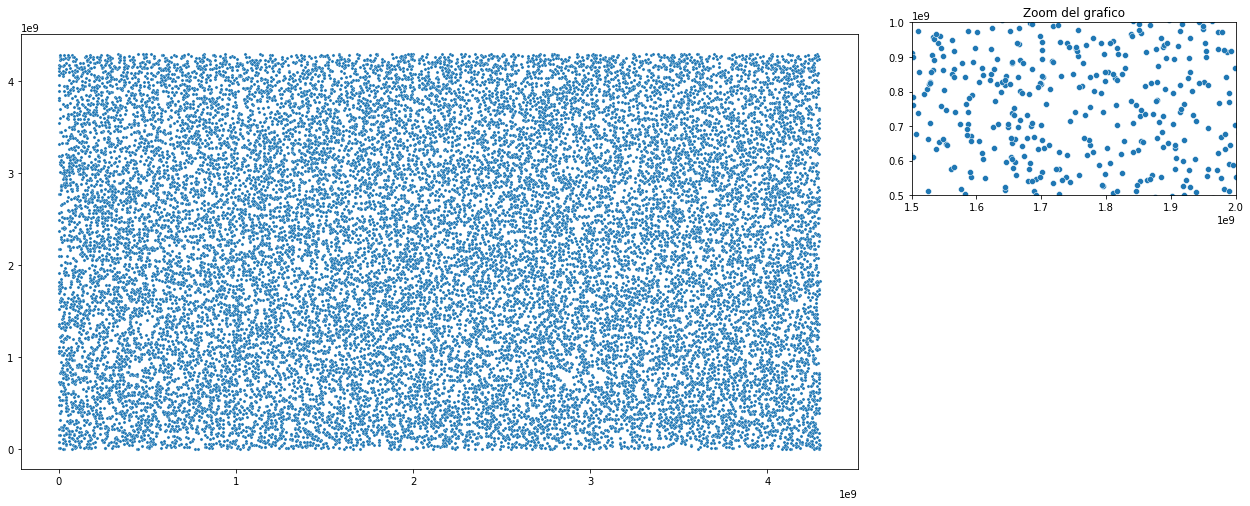

In [7]:
plt.figure(figsize=(15, 8))
ax = sns.scatterplot( x=x , y=y , s = 10 )

ax2 = plt.axes([0.95, 0.6, .3, .3])
sns.set_theme()

sns.scatterplot( x=x, y=y )
ax2.set_title('Zoom del grafico')
ax2.set_xlim([1.5e9,2e9])
ax2.set_ylim([0.5e9,1e9])

Podemos decir que es lo que esperabamos, ya que estan todos los puntos distribuidos en todo el plano.

Al verlos en el zoom, podemos ver que, a priori, no se generan lineas paralelas. Esto podria llegar a indicar que se trata de una distribucion uniforme, pero se verificara este supuesto con los tests.

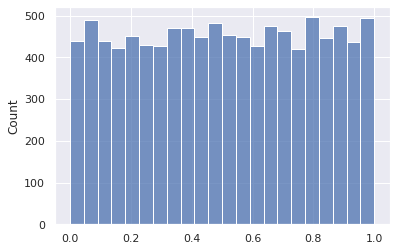

In [8]:
N = generarRandomNormalizada(10000)
sns.histplot(N)

Al hacer el histograma de los puntos normalizados, podemos ver que no hay muchas fluctaciones, la mayoria de los bins estan con la cuenta por 400. Parece que nuestro GCL es uniforme, por como es su distribucion

In [9]:
print( "Media: {:.2f}".format(np.mean(N) ) )
print( "Desvio: {:.2f}".format(np.std(N) ) )
print( "Mediana: {:.2f}".format(np.median(N) ) )

Media: 0.50
Desvio: 0.29
Mediana: 0.50


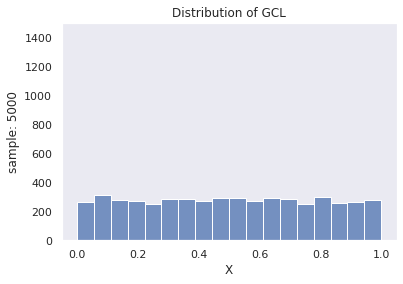

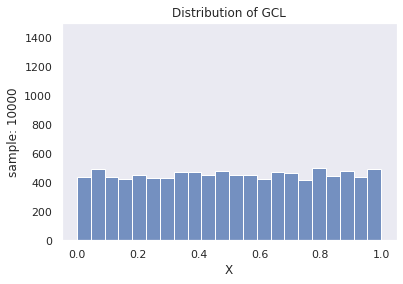

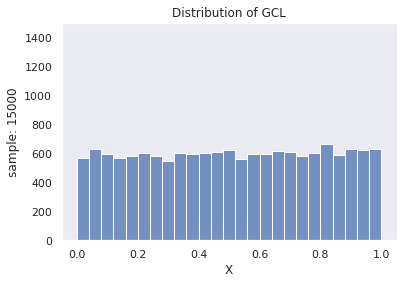

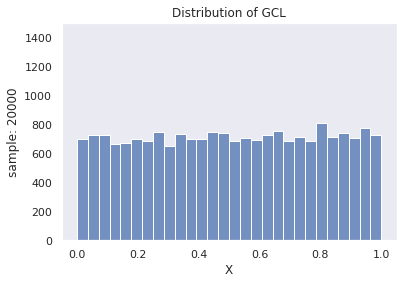

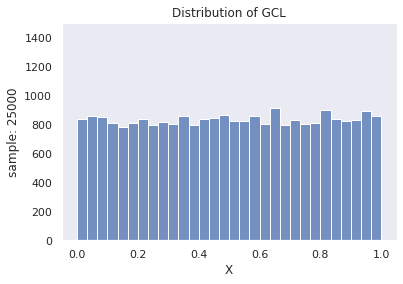

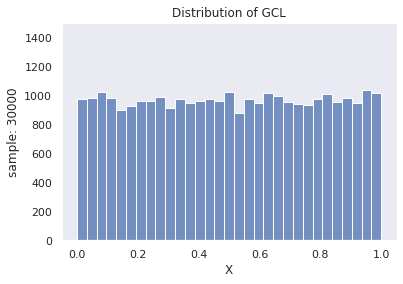

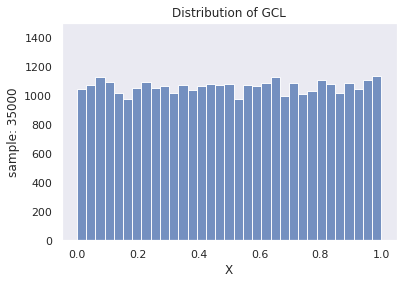

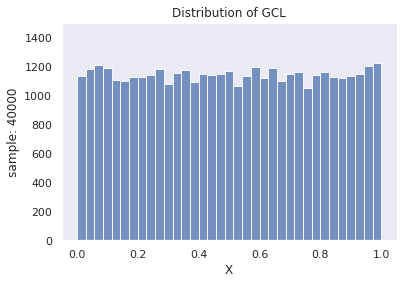

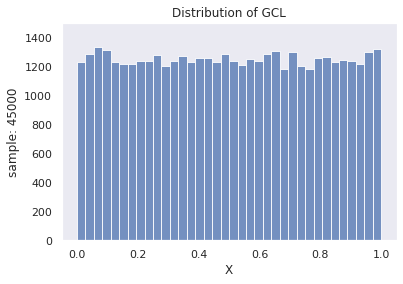

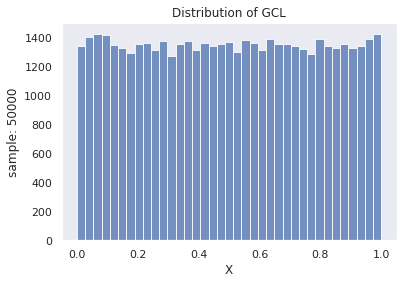

<Figure size 432x288 with 0 Axes>

In [10]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import imageio

def plot_for_offset(power, y_max):
    # Data for plotting
    s = generarRandomNormalizada(power)

    ax = sns.histplot(s)
    ax.grid()
    ax.set(xlabel='X', ylabel='sample: {}'.format(power),
           title='Distribution of GCL')
    fig = ax.figure
    # IMPORTANT ANIMATION CODE HERE
    # Used to keep the limits constant
    ax.set_ylim(0, y_max)

    # Used to return the plot as an image rray
    fig.canvas.draw()       # draw the canvas, cache the renderer
    image = np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8')
    image  = image.reshape(fig.canvas.get_width_height()[::-1] + (3,))
    plt.figure()
    return image

kwargs_write = {'fps':1.0, 'quantizer':'nq'}
imageio.mimsave('./powers.gif', [plot_for_offset(5000*(i+1), 1500) for i in range(10)], fps=1)

Al aumentar la muestra vemos que la distribucion se mantiene.

# Ejercicio 2

## Ejercicio 2.1

Vamos a utilizar nuestro generador para obtener numeros del 0 al 9 con nuestro gerador de numeros normalizados.

In [11]:
N = generarRandomNormalizada(1000000)

numGenerados = []

for j in range(9,-1,-1):
    numGenerados.append(0)

for i in N:
    if( i < 1/10 ) :
        numGenerados[0] += 1
    elif( i < 2/10 ):
        numGenerados[1] += 1
    elif( i < 3/10 ):
        numGenerados[2] += 1
    elif( i < 4/10 ):
        numGenerados[3] += 1
    elif( i < 5/10 ):
        numGenerados[4] += 1
    elif( i < 6/10 ):
        numGenerados[5] += 1
    elif( i < 7/10 ):
        numGenerados[6] += 1
    elif( i < 8/10 ):
        numGenerados[7] += 1
    elif( i < 9/10 ):
        numGenerados[8] += 1
    else:
        numGenerados[9] += 1

print("Tamaño de los numeros generados: " + str(sum(numGenerados)))

Tamaño de los numeros generados: 1000000


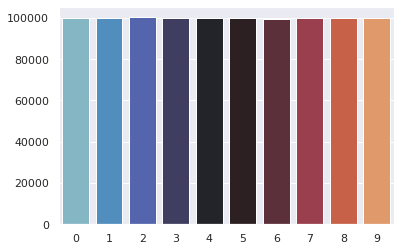

In [12]:
numSimulados = list(range(0,10))

ax = sns.barplot(x=numSimulados, y=numGenerados, palette='icefire')

No podemos decir que es una distribucion uniforme, pero realizamos un test con esta muestra para confirmarlo. Entonces vamos a hacer un test para ver si es realmente uniforme o no.

Entonces vamos a definir un test para ver si la distribucion es uniforme. Donde la hipotesis nula seria que p = 1/10.


In [13]:
from scipy.stats import chi2

print("Hipótesis nula: La distribucion es uniforme")

lanzamientos = sum(numGenerados)
frecuencia = 1/len(numGenerados)
gradosDeLibertad = len(numGenerados) - 1

D2 = sum([(fO - frecuencia*lanzamientos)**2 for fO in numGenerados])/(frecuencia*lanzamientos)

limiteSuperior = chi2.ppf(0.95, df = gradosDeLibertad )

print("Estadistico: {:.2f} ".format(D2))

print("Limite: {:.2f}".format(limiteSuperior))

if D2 <= limiteSuperior:
  print("El test acepta la hipotesis nula.")

else:
  print("El test rechaza la hipótesis nula")


Hipótesis nula: La distribucion es uniforme
Estadistico: 3.46 
Limite: 16.92
El test acepta la hipotesis nula.


## Ejercicio 2.2

Vamos a ver un otro ejemplo, generando numeros de 0 a 9 pero determinandolos de otra manera.

In [14]:
""" Generar numeros de 0 a 9 """

N = generarRandom(100000)

numGenerados = []

for j in range(9,-1,-1):
    numGenerados.append(0)

for i in N:
    numGenerados[ int( i % len(numGenerados) ) ] += 1

print("Tamaño de los numeros generados: " + str(sum(numGenerados)))

Tamaño de los numeros generados: 100000


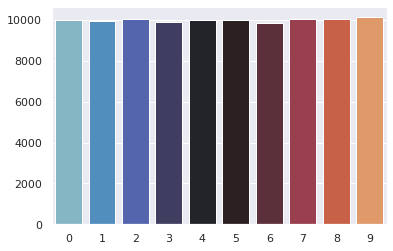

In [15]:
numSimulados = list(range(0,10))

ax = sns.barplot(x=numSimulados, y=numGenerados, palette='icefire')

En un principio no podemos decir que no es una distribucion uniforme, pero podemos confirmarlo. Entonces vamos a hacer un test para ver si es realmente uniforme o no.

Entonces vamos a definir un test para ver si la distribucion es uniforme. Donde la hipotesis nula seria que p = 1/10.


In [16]:
from scipy.stats import chi2

print("Hipótesis nula: La distribucion es uniforme")

lanzamientos = sum(numGenerados)
frecuencia = 1/len(numGenerados)
gradosDeLibertad = len(numGenerados) - 1

D2 = sum([(fO - frecuencia*lanzamientos)**2 for fO in numGenerados])/(frecuencia*lanzamientos)

limiteSuperior = chi2.ppf(0.95, df = gradosDeLibertad )

print("Estadistico: {:.2f} ".format(D2))

print("Limite: {:.2f}".format(limiteSuperior))

if D2 <= limiteSuperior:
  print("El test acepta la hipotesis nula.")

else:
  print("El test rechaza la hipótesis nula")


Hipótesis nula: La distribucion es uniforme
Estadistico: 5.79 
Limite: 16.92
El test acepta la hipotesis nula.


## Ejercicio 2.3

Vamos a simular una moneda con cara o seca, para ver si nuestro GCL distribuye bien las probabilidades

In [17]:
N = generarRandom(100000)

numGenerados = []

for j in range(0,2):
    numGenerados.append(0)

for i in N:
    if i < modulo/2:
        numGenerados[0] += 1
    else:
        numGenerados[1] += 1

print("Tamaño de los numeros generados: " + str(sum(numGenerados)))

Tamaño de los numeros generados: 100000


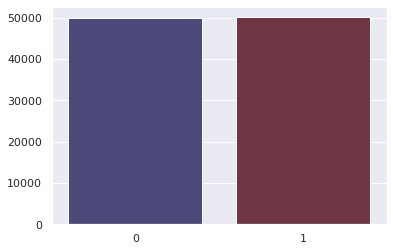

In [18]:
numSimulados = list(range(0,2))

ax = sns.barplot(x=numSimulados, y=numGenerados, palette='icefire')

In [19]:
print("Hipótesis nula: La distribucion es uniforme")

lanzamientos = sum(numGenerados)
frecuencia = 1/len(numGenerados)
gradosDeLibertad = len(numGenerados) - 1

D2 = sum([(fO - frecuencia*lanzamientos)**2 for fO in numGenerados])/(frecuencia*lanzamientos)

limiteSuperior = chi2.ppf(0.95, df = gradosDeLibertad )

print("Estadistico: {:.2f} ".format(D2))

print("Limite: {:.2f}".format(limiteSuperior))

if D2 <= limiteSuperior:
  print("El test acepta la hipotesis nula.")

else:
  print("El test rechaza la hipótesis nula")

Hipótesis nula: La distribucion es uniforme
Estadistico: 0.25 
Limite: 3.84
El test acepta la hipotesis nula.


## Ejercicio 2.4

A continuacion realizaremos el test de Kolmogorov. Por lo tanto, no discretizamos la variable.
En primer lugar, calculamos la funcion de distribucion empirica mediante la muestra generada,
y luego buscamos el punto en el que la distancia entre la funcion empirica y la teorica sea maxima

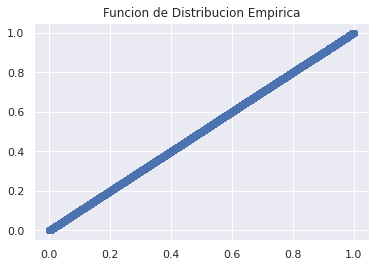

In [20]:
n = 200000
muestra = generarRandomNormalizada(n)
muestra = np.sort(muestra)
y = np.arange(1,n+1)/n
plt.title('Funcion de Distribucion Empirica')
plt.scatter(muestra, y )

Dado que buscarmos el $$ q = max_{x}|F_{X}(x) - \check{F_{X}}(x)|$$, donde $$F_{X}(x)$$ es la
funcion de distribucion de $$X~U(0,1)$$ y $$\check{F_{X}}(x)$$ es la funcion de distribucion empirica,
como $$F_{X}(x) = x , 0 < x < 1 $$ y $$\check{F_{X}}(x)$$ viene dada en escalones, los puntos a analizar en los
que el modulo de la distancia entre ambas funciones es maxima son los extremos de cada uno de estos "escalones".
Por lo tanto, analizamos ambos casos: en los que se calcula el limite acercandose por la izquierda
(cuando el escalon se encuentra debajo de la funcion, habra una maxima distancia en este caso), y en los que se
calcula el limite por derecha (cuando el escalon se encuentra arriba de la funcion se encontrara la mayor distancia
del escalon a la funcion).
Luego, teniendo todas estas distancias en cuenta, se puede calcular el factor q.


In [21]:
q1 = np.max(abs(y - muestra - 1/n)) #restamos 1/n porque analizamos limite por izquierda
q2 = np.max(abs(y - muestra)) # limite por derecha -> es el mismo punto (muestra, y)
q = max(q1,q2)
print ("Luego, el estadistico q = " + str(q))



Luego, el estadistico q = 0.00136607067734007


Por ultimo, por lo visto en la teorica, se rechaza H<sub>0</sub> si $$ q > \sqrt{\frac{-ln(\alpha/2)}{2n}} $$ donde
$$\alpha = 0,05$$ es el nivel de significacion del test y n, el numero de muestras.

In [22]:
alpha = 0.05
if(q > np.sqrt(-np.log(alpha/2)/(2*n))):
    print("Se rechaza H0 => No esta distribuida uniformemente")
else:
    print("No se rechaza H0 => No se puede afirmar que no esta distribuida uniformemente.")

No se rechaza H0 => No se puede afirmar que no esta distribuida uniformemente.
